# Importing libraries

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500) 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [381]:
walmart_df = pd.read_csv("/Users/enejanhayytjanova/Desktop/My Githup/Basket Analysis/data/Walmart_Final_merged.csv")

In [382]:
walmart_df.head()

,Customer_Name,Carrier,Delivery_Date,Discount,Fulfillment_Entity,Item_Cost,Competitor_Ship_Price,Order#,Order_Date,Qty,Ship_By,Shipping_Cost,Shipping_Method,Shipping_SLA,SKU,State,City,Status,Item_Description,Shipping_Tier,Product_Category,Buy_Box_Item_Price,Buy_Box_Eligible,Shipping_Weight,Brand,Reviews_Count,Average_Rating,Primary_Variant?,Competitor_Price,Rating_Category
0,Shelley Facchina,Fedex,2023-11-08,0.0,SellerFulfilled,22.96,0.0,200011336950958,2023-10-31,1,2023-11-01,0.0,VALUE,6,011246999225-C-F-L1-7.99,NC,SOUTHPORT,Shipped,Robert Rothschild Farm Roasted Pineapple & Hab...,VALUE,Food & Beverage,20.98,Yes,3.00,Robert Rothschild Farm,2.0,5.0,Self,30.00,High
1,Jodi Sasadeusz,UPS,2023-11-08,0.0,SellerFulfilled,78.99,0.0,200011348956033,2023-10-31,1,2023-11-01,0.0,VALUE,6,025695983902-C-P-L1-22.99,CA,Roseville,Shipped,"Beautyrest Black Pillows, 2-Pack Standard Queen",VALUE,Bedding,44.99,Yes,6.00,Beautyrest,34.0,4.3,Self,95.99,High
2,Ryan Spallina,UPS,2023-11-08,0.0,SellerFulfilled,78.99,0.0,200011522169379,2023-10-31,1,2023-11-01,0.0,VALUE,6,025695983902-C-P-L1-22.99,CA,Berkeley,Shipped,"Beautyrest Black Pillows, 2-Pack Standard Queen",VALUE,Bedding,44.99,Yes,6.00,Beautyrest,34.0,4.3,Self,95.99,High
3,Richard Agnew,UPS,2023-11-08,0.0,SellerFulfilled,78.99,0.0,200011420702608,2023-10-31,1,2023-11-01,0.0,VALUE,6,025695983902-C-P-L1-22.99,NC,Salisbury,Shipped,"Beautyrest Black Pillows, 2-Pack Standard Queen",VALUE,Bedding,44.99,Yes,6.00,Beautyrest,34.0,4.3,Self,95.99,High
4,Robert Billingsley,Fedex,2023-11-08,0.0,SellerFulfilled,49.99,0.0,200011340108900,2023-10-31,1,2023-11-01,0.0,VALUE,6,076642501908-CB-P-L1-16.99,OH,Roseville,Delivered,sterno products 50162 cpc 8 oz butane fuel car...,VALUE,"Home Decor, Kitchen, & Other",49.62,Yes,6.57,Sterno,3.0,2.3,Self,42.98,Low


In [383]:
walmart_df.columns

Index(['Customer_Name', 'Carrier', 'Delivery_Date', 'Discount',
       'Fulfillment_Entity', 'Item_Cost', 'Competitor_Ship_Price', 'Order#',
       'Order_Date', 'Qty', 'Ship_By', 'Shipping_Cost', 'Shipping_Method',
       'Shipping_SLA', 'SKU', 'State', 'City', 'Status', 'Item_Description',
       'Shipping_Tier', 'Product_Category', 'Buy_Box_Item_Price',
       'Buy_Box_Eligible', 'Shipping_Weight', 'Brand', 'Reviews_Count',
       'Average_Rating', 'Primary_Variant?', 'Competitor_Price',
       'Rating_Category'],
      dtype='object')

# Walmart

pip install pandas mlxtend

In [384]:
#pip install pandas mlxtend

In [385]:
walmart_df['Order#'].unique()

array([200011336950958, 200011348956033, 200011522169379, ...,
       200011710985494, 200011653762089, 200011632951876])

In [386]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Focus on relevant columns: 'Order#' (Transaction ID) and 'SKU' (Item Identifier)
basket = walmart_df[['Order#', 'SKU']]

# One-hot encoding: Pivot the table to have unique SKUs as columns
basket = basket.groupby(['Order#', 'SKU'])['SKU'].count().unstack().reset_index().fillna(0).set_index('Order#')

# Convert the counts to 1 (purchased) or 0 (not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Ensure the DataFrame is boolean
basket = basket.astype(bool)

# Apply Apriori Algorithm to find frequent itemsets with at least 0.01% support  (I have tried 0.01, 0.001 there is no Association rules from Apriori)
print("Running Apriori Algorithm...")
frequent_itemsets_apriori = apriori(basket, min_support=0.0001, use_colnames=True)

if frequent_itemsets_apriori.empty:
    print("No frequent itemsets found with Apriori. Consider lowering the min_support value.")
else:
    print("Frequent itemsets from Apriori:")
    print(frequent_itemsets_apriori)
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
    if rules_apriori.empty:
        print("No association rules found with Apriori.")
    else:
        rules_apriori = rules_apriori.sort_values('lift', ascending=False)
        print("Association rules from Apriori:")
        rules_apriori_df = pd.DataFrame(rules_apriori)
rules_apriori_df.head()
        


Running Apriori Algorithm...
Frequent itemsets from Apriori:
      support                                           itemsets
0    0.000120                      (00651281140604-C-P-L1-31.98)
1    0.000359                     (00679541252263-CB-F-L1-11.99)
2    0.001077                       (009060349708-CB-P-L1-16.49)
3    0.001436                       (0096619095032-C-P-L2-18.99)
4    0.004307                       (009800892303-CB-P-L1-17.99)
..        ...                                                ...
649  0.000120         (IP-UPU7-8L3Z, W5-CRXA-GA3G, P7-QU6L-HSSW)
650  0.000120  (IP-UPU7-8L3Z, W5-CRXA-GA3G, halley-bathrobe-b...
651  0.000120  (harveast-sun-apricot-1lb-2x, harveast-dried-m...
652  0.000120  (4D-RLX0-2CTI, OI-JSF0-RBO0, Halley-Soldier-Ha...
653  0.000120  (4P-V8N8-F91E, IP-UPU7-8L3Z, W5-CRXA-GA3G, P7-...

[654 rows x 2 columns]
Association rules from Apriori:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
230,"(IP-UPU7-8L3Z, P7-QU6L-HSSW)","(4P-V8N8-F91E, W5-CRXA-GA3G)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
213,"(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)","(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
216,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
226,"(IP-UPU7-8L3Z, 4P-V8N8-F91E)","(W5-CRXA-GA3G, P7-QU6L-HSSW)",0.00012,0.000239,0.00012,1.0,4179.0,0.00012,inf,0.99988


In [387]:
# Filter high confidence rules
high_confidence_rules = rules_apriori_df[rules_apriori_df['confidence'] > 0.7]
print("High Confidence Rules:")
high_confidence_rules.head()

High Confidence Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
230,"(IP-UPU7-8L3Z, P7-QU6L-HSSW)","(4P-V8N8-F91E, W5-CRXA-GA3G)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
213,"(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)","(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
216,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
226,"(IP-UPU7-8L3Z, 4P-V8N8-F91E)","(W5-CRXA-GA3G, P7-QU6L-HSSW)",0.00012,0.000239,0.00012,1.0,4179.0,0.00012,inf,0.99988


In [388]:
# Filter high lift rules
high_lift_rules = rules_apriori_df[rules_apriori_df['lift'] > 1.5]
print("High Lift Rules:")
high_lift_rules.head()

High Lift Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
230,"(IP-UPU7-8L3Z, P7-QU6L-HSSW)","(4P-V8N8-F91E, W5-CRXA-GA3G)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
213,"(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)","(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
216,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)",0.00012,0.000120,0.00012,1.0,8358.0,0.00012,inf,1.00000
226,"(IP-UPU7-8L3Z, 4P-V8N8-F91E)","(W5-CRXA-GA3G, P7-QU6L-HSSW)",0.00012,0.000239,0.00012,1.0,4179.0,0.00012,inf,0.99988


In [389]:

# Sort by lift
sorted_by_lift = rules_apriori_df.sort_values(by='lift', ascending=False)
print("Sorted by Lift:")
sorted_by_lift.head()

Sorted by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
216,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
230,"(IP-UPU7-8L3Z, P7-QU6L-HSSW)","(4P-V8N8-F91E, W5-CRXA-GA3G)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
213,"(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)","(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
215,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Burgundy)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Turquaz)",0.000239,0.00012,0.00012,0.5,4179.0,0.00012,1.999761,1.0


In [390]:

# Sort by confidence
sorted_by_confidence = rules_apriori_df.sort_values(by='confidence', ascending=False)
print("Sorted by Confidence:")
sorted_by_confidence.head()

Sorted by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
227,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.00012,0.000120,0.00012,1.0,8358.000000,0.000120,inf,1.000000
142,"(OI-JSF0-RBO0, 4D-RLX0-2CTI)",(Halley-Soldier-Hand4-Turquaz),0.00012,0.005145,0.00012,1.0,194.372093,0.000119,inf,0.994974
63,(Halley-Soldier-Washcloth8-Gray),(Halley-Soldier-Bath2-Gray),0.00012,0.000957,0.00012,1.0,1044.750000,0.000120,inf,0.999162
211,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Burgundy, ...",(4D-RLX0-2CTI),0.00012,0.000957,0.00012,1.0,1044.750000,0.000120,inf,0.999162
144,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",(4D-RLX0-2CTI),0.00012,0.000957,0.00012,1.0,1044.750000,0.000120,inf,0.999162


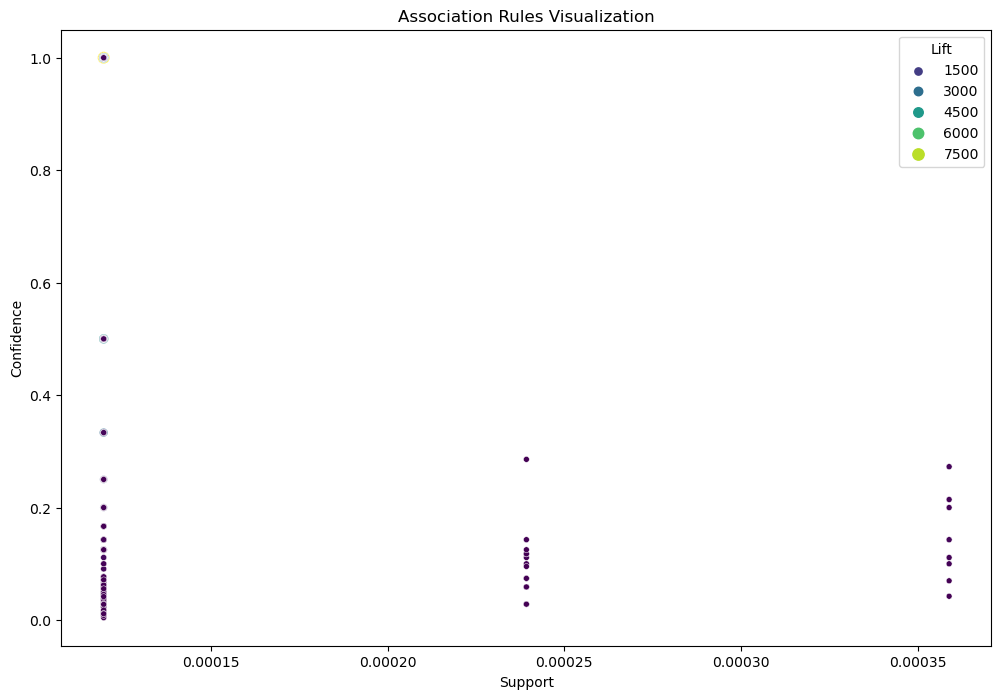

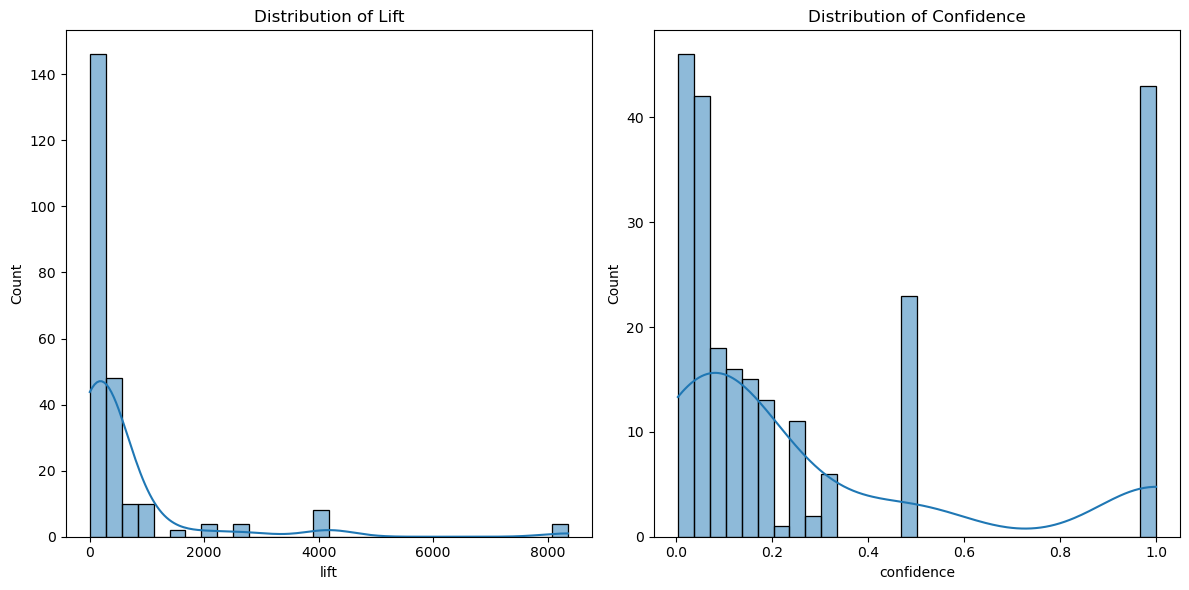

In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support vs confidence with lift as size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_apriori_df, palette='viridis')
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

# Histograms of lift and confidence
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(rules_apriori_df['lift'], bins=30, kde=True)
plt.title('Distribution of Lift')

plt.subplot(1, 2, 2)
sns.histplot(rules_apriori_df['confidence'], bins=30, kde=True)
plt.title('Distribution of Confidence')

plt.tight_layout()
plt.show()


**Scatter Plot Analysis:**

X-Axis (Support): Indicates how frequently the itemset appears in the dataset. Higher values mean the rule applies to a larger portion of transactions.

Y-Axis (Confidence): Measures the likelihood that the consequent is purchased given that the antecedent is purchased. Higher values indicate stronger predictive power of the rule.

**2. Histogram of Lift**

X-Axis (Lift): Represents the lift of the rules, which measures the strength of the association between antecedent and consequent relative to what would be expected by chance.

Y-Axis (Frequency): Shows how many rules fall into each lift range.

Interpretation:

High Lift Values: A high lift indicates that the items are strongly associated. If many rules have high lift values, it means there are strong associations that can be leveraged.

Low Lift Values: If the majority of rules have low lift values, it means that the associations between items are weaker or closer to what would be expected by chance.


**3. Histogram of Confidence**

X-Axis (Confidence): Shows the confidence of the rules, which measures how likely the consequent is to occur given the antecedent.

Y-Axis (Frequency): Indicates how many rules fall into each confidence range.

Interpretation:

High Confidence Values: If most rules have high confidence values, it indicates that the rules are reliable predictors.
Low Confidence Values: If most rules have low confidence values, it means that while the associations may exist, they are not strong predictors.

In [392]:
print("Number of transactions:", walmart_df['Order#'].nunique())
print("Number of unique items:", walmart_df['SKU'].nunique())

# Check the distribution of items in transactions
item_counts = walmart_df['SKU'].value_counts()
print(item_counts.describe())

# Check how many items are typically in each transaction
items_per_transaction = walmart_df.groupby('Order#')['SKU'].count()
print(items_per_transaction.describe())

Number of transactions: 8358
Number of unique items: 574
count    574.000000
mean      14.729965
std       23.448772
min        1.000000
25%        2.000000
50%        6.000000
75%       18.000000
max      256.000000
Name: count, dtype: float64
count    8358.000000
mean        1.011606
std         0.123699
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: SKU, dtype: float64


In [393]:
# Example to check sparsity
sparsity = (basket.sum().sum()) / (basket.shape[0] * basket.shape[1])
print(f"Sparsity level: {sparsity * 100:.2f}%")

Sparsity level: 0.18%


A sparsity level of 0.18% indicates that the dataset is extremely sparse, meaning that only 0.18% of all possible item combinations are present in the transactions. In practical terms, this means that most transactions contain very few items, and it is rare for items to be bought together frequently enough to form strong associations. This is likely why the Apriori algorithm isn't finding any frequent itemsets.

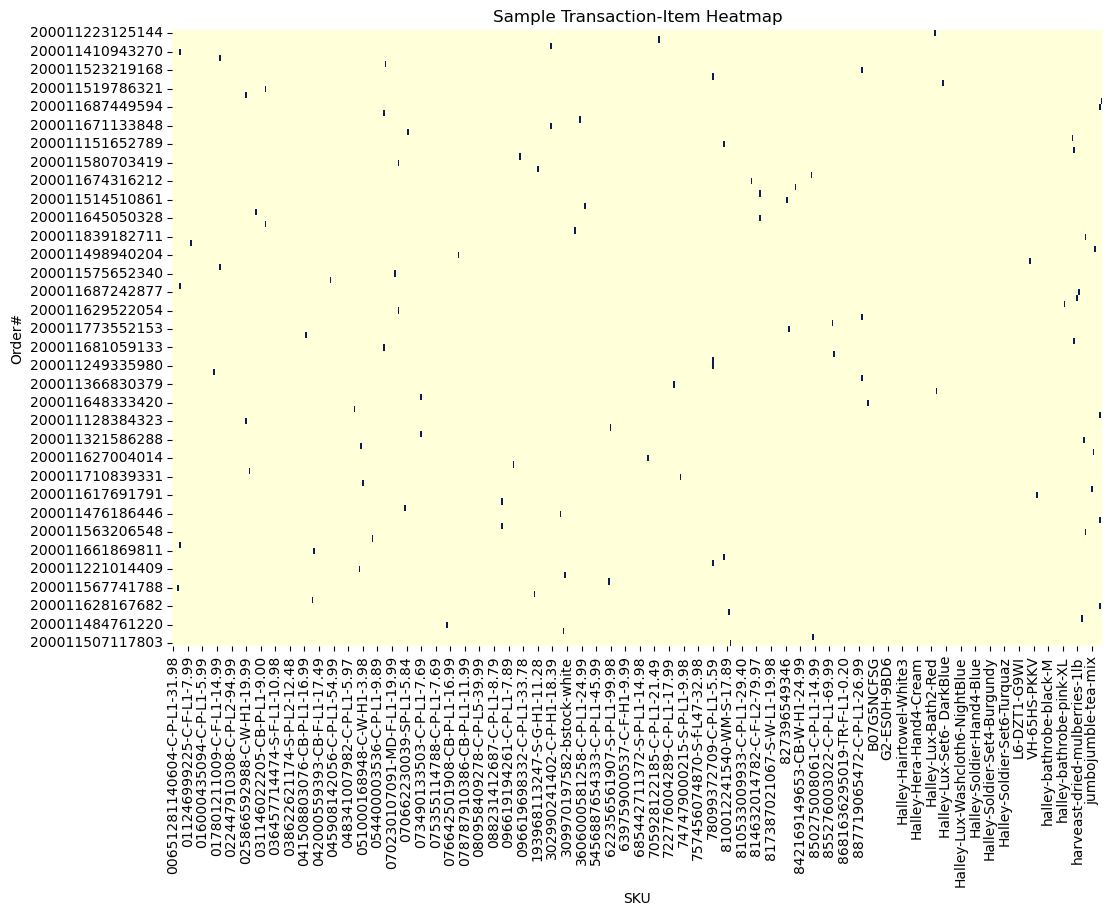

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a smaller subset for visualization
sample_basket = basket.sample(100)

plt.figure(figsize=(12, 8))
sns.heatmap(sample_basket, cmap="YlGnBu", cbar=False)
plt.title("Sample Transaction-Item Heatmap")
plt.show()

**Understanding Each Metric**

**Antecedents**
Description: Items that are in the left-hand side of the rule (e.g., {Item A} in {Item A} => {Item B}).
Use: Identifies what items frequently lead to the purchase of other items.

**Consequents**
Description: Items that are in the right-hand side of the rule (e.g., {Item B} in {Item A} => {Item B}).
Use: Shows which items are often purchased when the antecedents are bought.

**Antecedent Support**
Description: The proportion of transactions that contain the antecedent itemset.
Use: Helps understand how frequently the antecedent appears in the dataset.

**Consequent Support**
Description: The proportion of transactions that contain the consequent itemset.
Use: Helps understand how frequently the consequent appears in the dataset.

**Support**
Description: The proportion of transactions that contain both the antecedent and consequent itemsets.
Use: Indicates how frequently the rule occurs in the dataset.

**Confidence**
Description: The likelihood that the consequent is purchased when the antecedent is purchased, calculated as:
Confidence
=
Support(A and B)
Support(A)
Confidence= 
Support(A)
Support(A and B)
​
 
Use: Measures the reliability of the rule; a higher confidence means a stronger association.

**Lift**
Description: The ratio of the observed support to the expected support if the antecedent and consequent were independent, calculated as:
Lift
=
Support(A and B)
Support(A)
×
Support(B)
Lift= 
Support(A)×Support(B)
Support(A and B)
​
 
Use: Indicates the strength of the association; values greater than 1 suggest a positive association.

**Leverage**
Description: Measures how much more often the antecedent and consequent occur together than expected by chance, calculated as:
Leverage
=
Support(A and B)
−
(
Support(A)
×
Support(B)
)
Leverage=Support(A and B)−(Support(A)×Support(B))
Use: Helps identify rules where the items occur together more frequently than would be expected by chance.

**Conviction**
Description: Measures how much more likely the consequent is to occur when the antecedent occurs, compared to when the antecedent does not occur, calculated as:
Conviction
=
1
−
Support(B)
1
−
Confidence
Conviction= 
1−Confidence
1−Support(B)
​
 
Use: Higher values indicate stronger rules; a value of 1 suggests no association.

**Zhang's Metric**
Description: A metric that combines aspects of confidence and support to assess rule strength.
Use: Provides an additional way to evaluate rules, though it’s less common and may not always be directly applicable.

## Apriori Save

In [395]:
def get_recommendations(input_products, rules, data, key_column, description_col, max_recommendations=5):
    recommendations = set()

    for index, rule in rules.iterrows():
        # Check if all antecedents in the rule are a subset of the input products
        if set(rule['antecedents']).issubset(set(input_products)):
            # Add consequents from the rule to recommendations
            recommendations.update(rule['consequents'])

    # Remove input products from recommendations
    recommendations = list(recommendations - set(input_products))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = data[data[key_column].isin(recommendations)]
    
    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products[[key_column, description_col]].drop_duplicates().head(max_recommendations)

    return recommended_products

In [396]:
import pickle

# Save the rules DataFrame (rules_apriori_df) to a file
with open('product_recommendation_model_walmart_aprior.pkl', 'wb') as f:
    pickle.dump(rules_apriori_df, f)
    

In [397]:
import pickle

# Load the rules DataFrame (rules_apriori_df) from the file
with open('product_recommendation_model_walmart_aprior.pkl', 'rb') as f:
    rules_apriori = pickle.load(f)

In [398]:
# Example usage
input_products = ['OI-JSF0-RBO0']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_apriori, walmart_df, 'SKU', 'Item_Description', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products:                                 SKU  \
380   Halley-Soldier-Hand4-Burgundy   
402    Halley-Soldier-Hand4-Turquaz   
2395                   4D-RLX0-2CTI   

                                       Item_Description  
380   HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
402   HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
2395  HALLEY Decorative Bath Towels Set, 6 Piece - T...  


## FP-Growth 

In [399]:
# Apply FP-Growth Algorithm to find frequent itemsets with at least 0.0001% support
print("Running FP-Growth Algorithm...")
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.0001, use_colnames=True)

if frequent_itemsets_fpgrowth.empty:
    print("No frequent itemsets found with FP-Growth. Consider lowering the min_support value.")
else:
    print("Frequent itemsets from FP-Growth:")
    pd.DataFrame(frequent_itemsets_fpgrowth)
    rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)
    if rules_fpgrowth.empty:
        print("No association rules found with FP-Growth.")
    else:
        rules_fpgrowth = rules_fpgrowth.sort_values('lift', ascending=False)
        print("Association rules from FP-Growth:")

        rules_fpgrowth_df = pd.DataFrame(rules_fpgrowth)
rules_fpgrowth_df.head()

Running FP-Growth Algorithm...
Frequent itemsets from FP-Growth:
Association rules from FP-Growth:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
172,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
119,"(IP-UPU7-8L3Z, P7-QU6L-HSSW)","(4P-V8N8-F91E, W5-CRXA-GA3G)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
122,"(4P-V8N8-F91E, W5-CRXA-GA3G)","(IP-UPU7-8L3Z, P7-QU6L-HSSW)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
169,"(4D-RLX0-2CTI, Halley-Soldier-Hand4-Burgundy)","(OI-JSF0-RBO0, Halley-Soldier-Hand4-Turquaz)",0.000120,0.00012,0.00012,1.0,8358.0,0.00012,inf,1.0
171,"(OI-JSF0-RBO0, Halley-Soldier-Hand4-Burgundy)","(4D-RLX0-2CTI, Halley-Soldier-Hand4-Turquaz)",0.000239,0.00012,0.00012,0.5,4179.0,0.00012,1.999761,1.0


In [400]:
import pandas as pd
import pickle

def get_recommendations(input_skus, rules, walmart_df, key_column, desc_column, max_recommendations=5):
    recommendations = []

    for index, rule in rules.iterrows():
        if all(sku in input_skus for sku in rule['antecedents']):
            recommendations.extend(list(rule['consequents']))

    # Remove input SKUs from the recommendations
    recommendations = list(set(recommendations) - set(input_skus))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = walmart_df[walmart_df['SKU'].isin(recommendations)]

    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products.head(max_recommendations)

    return recommended_products[['SKU', 'Item_Description']]


In [401]:
import pickle

# Save the rules DataFrame (rules_fpgrowth) to a file
with open('product_recommendation_model_walmart_fp-growth.pkl', 'wb') as f:
    pickle.dump(rules_fpgrowth_df, f)

In [402]:
import pickle

# Load the rules DataFrame (rules_fpgrowth) from the file
with open('product_recommendation_model_walmart_fp-growth.pkl', 'rb') as f:
    rules_fpgrowth = pickle.load(f)

In [403]:
# Example usage
input_products = ['OI-JSF0-RBO0']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_fpgrowth, walmart_df, 'SKU', 'Item_Description', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products:                                SKU  \
380  Halley-Soldier-Hand4-Burgundy   
402   Halley-Soldier-Hand4-Turquaz   
420  Halley-Soldier-Hand4-Burgundy   
466   Halley-Soldier-Hand4-Turquaz   
480  Halley-Soldier-Hand4-Burgundy   

                                      Item_Description  
380  HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
402  HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
420  HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
466  HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  
480  HALLEY Decorative Hand Towels Set, 4 Pack - Tu...  


Plotting Network Graph for Apriori Rules


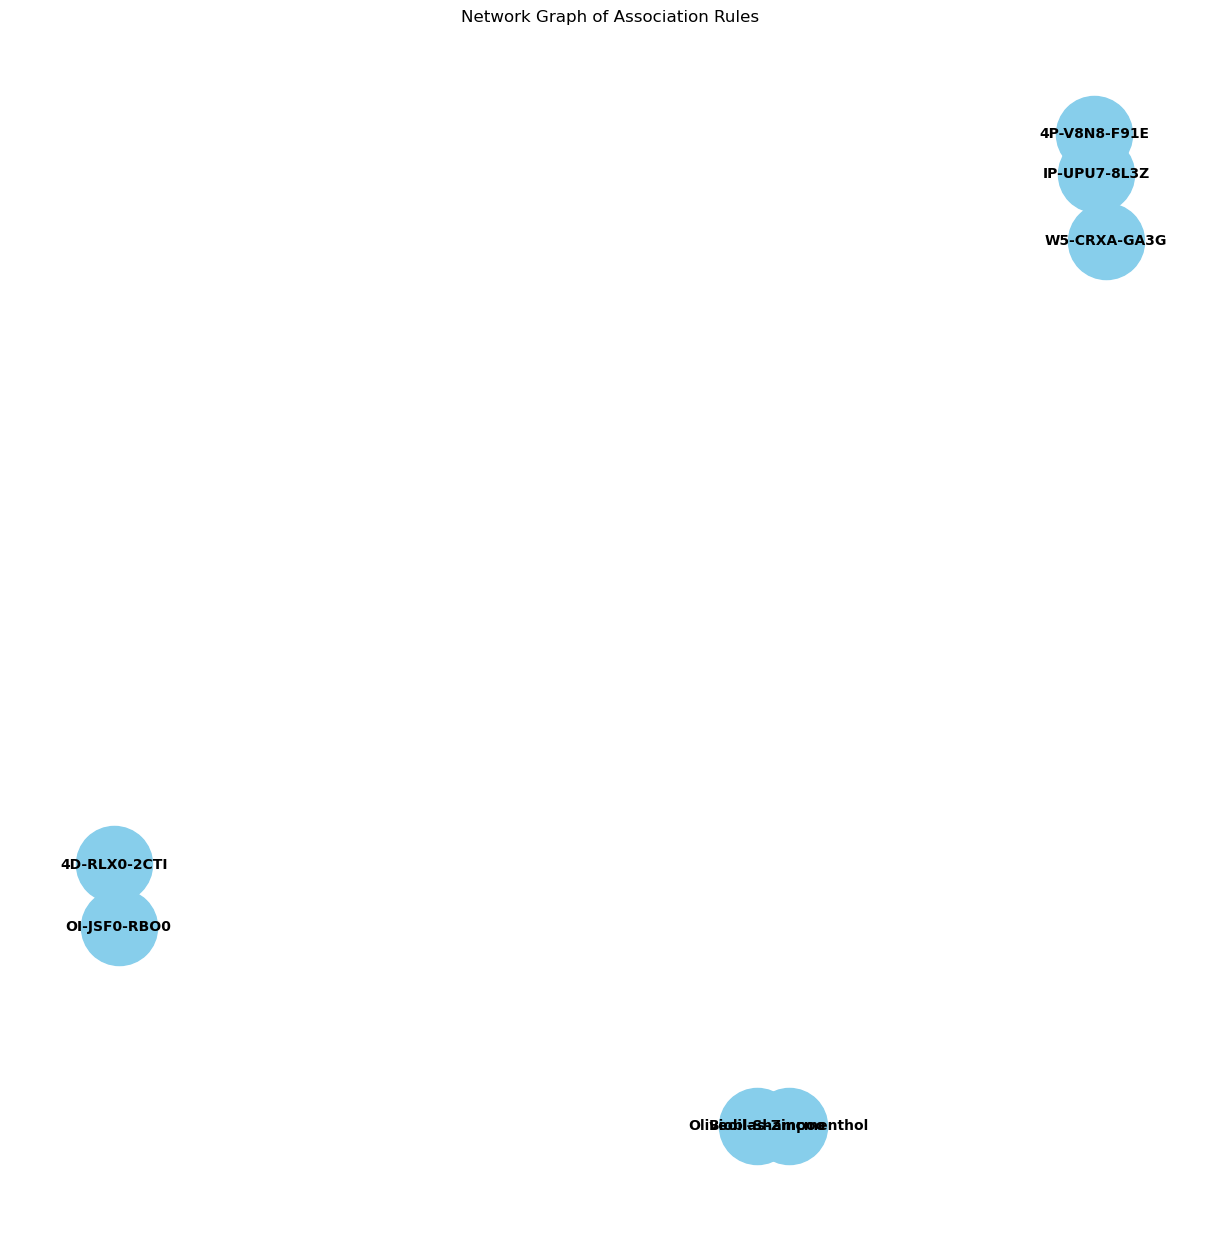

Plotting Network Graph for FP-Growth Rules


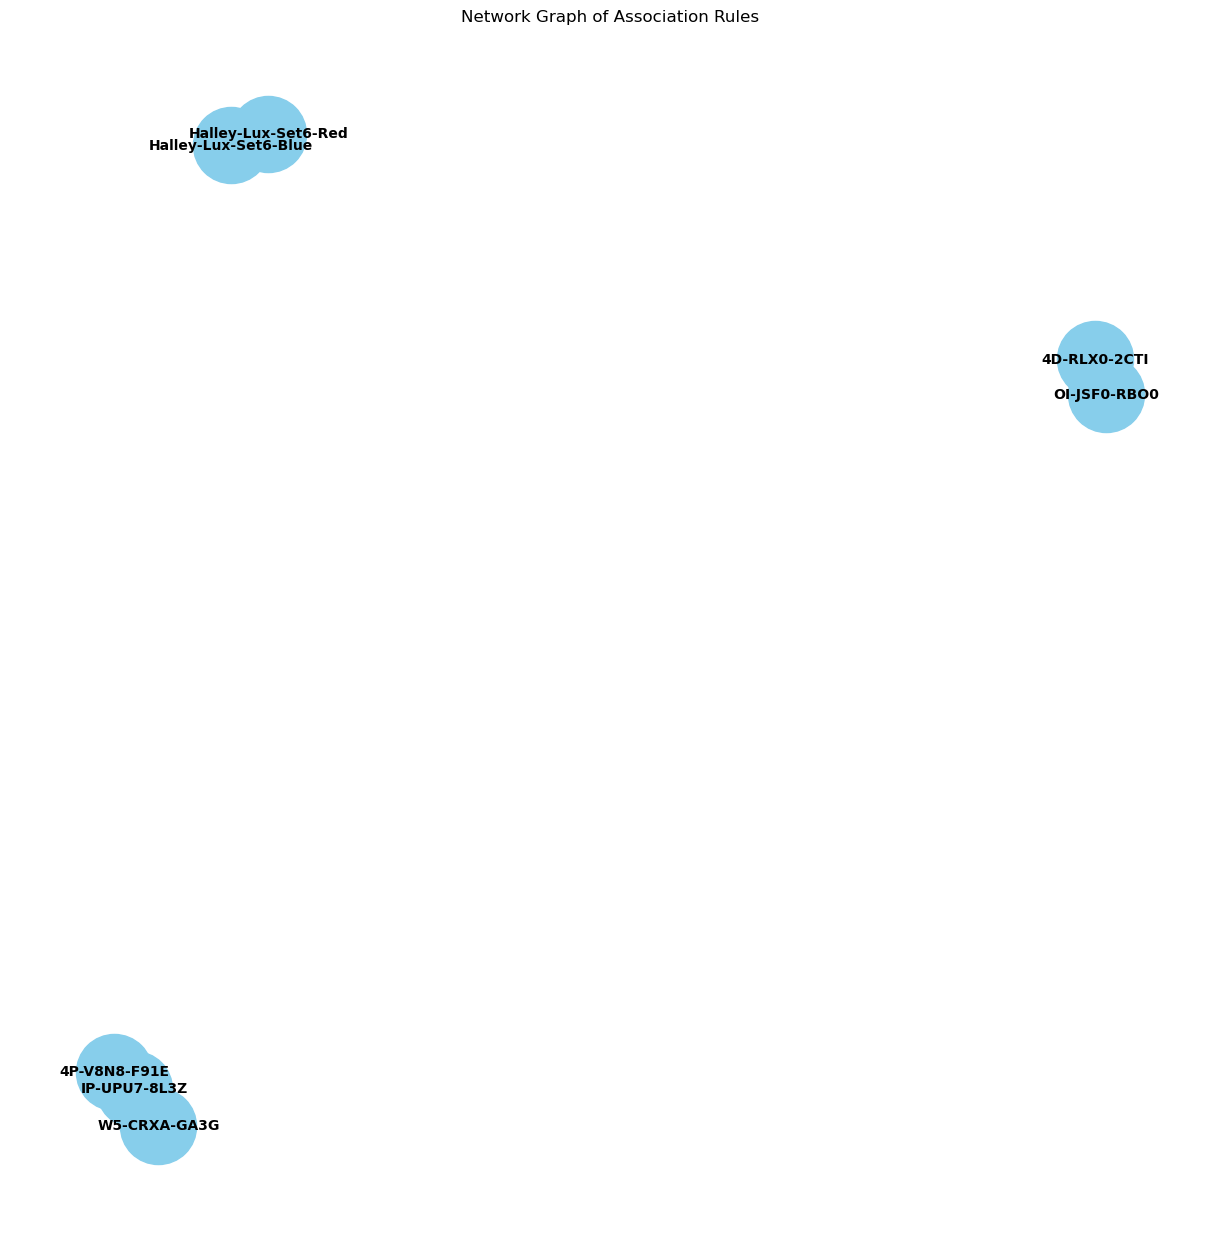

In [404]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network_graph(rules, top_n=10):
    G = nx.DiGraph()
    # Select the top_n rules based on lift
    top_rules = rules.nlargest(top_n, 'lift')
    
    # Add edges to the graph
    for _, row in top_rules.iterrows():
        antecedent = list(row['antecedents'])[0]
        consequent = list(row['consequents'])[0]
        G.add_edge(antecedent, consequent, weight=row['lift'])
    
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Network Graph of Association Rules')
    plt.show()

# Plot the network graph for Apriori rules
print("Plotting Network Graph for Apriori Rules")
if not rules_apriori_df.empty:
    plot_network_graph(rules_apriori_df, top_n=10)
else:
    print("No association rules found with Apriori to plot.")

# Plot the network graph for FP-Growth rules
print("Plotting Network Graph for FP-Growth Rules")
if not rules_fpgrowth_df.empty:
    plot_network_graph(rules_fpgrowth_df, top_n=10)
else:
    print("No association rules found with FP-Growth to plot.")


# eBay

In [405]:
ebay_df = pd.read_csv("/Users/enejanhayytjanova/Desktop/My Githup/Basket Analysis/data/eBay _Order_final.csv")

In [406]:
ebay_df.head()

,Sales Record Number,Buyer Username,Buyer Country,Ship To City,Ship To State,Item Number,Item Title,SKU,Sold Via Promoted Listings,Quantity,Sold For,Item Location,Total Price,Sale Date,Minimum Estimated Delivery Date,Maximum Estimated Delivery Date,Shipped On Date,Feedback Received,Shipping Service,Cancel_Order
0,16020,brblank-75,United States,Oceana,WV,133851096511,"Coca-Cola Soda Soft Drink, 12 fl oz, 35 Pack",049000058468-C-P-L2-10.49,No,1.0,39.95,"Arlington Heights, Illinois",42.35,2024-02-29,2024-03-08,2024-03-08,2024-03-01,No Feedback,USPS Ground Advantage,No
1,16019,2011superchief,United States,Marceline,MO,133255797909,Tassos Double Stuffed Jalapeno and Garlic Oliv...,652878008635-C-P-L6-40.74,No,1.0,77.99,"Arlington Heights, Illinois",82.26,2024-02-29,2024-03-05,2024-03-08,2024-03-01,positive,USPS Priority Mail Flat Rate Envelope,No
2,16018,vettsh-0,United States,Whittier,CA,133545957886,Natural Duraflame Fire Logs 6 Lb - Case of 9,041137009078-C-P-L1-32.99,No,2.0,75.99,"Arlington Heights, Illinois",167.56,2024-02-29,2024-03-05,2024-03-09,2024-03-01,No Feedback,USPS Ground Advantage,No
3,16017,whizzy1,United States,merritt island,FL,134725756844,Starbucks Limited Edition 2021 Holiday Blend K...,050000563319-C-P-L3-31.98,No,1.0,51.90,"Arlington Heights, Illinois",0.00,2024-02-29,2024-03-04,2024-03-04,2024-02-29,No Feedback,USPS Ground Advantage,Yes
4,16016,base0123,United States,New Haven,CT,134743149495,Topo Chico Twist of Lime Sparkling Mineral Wat...,021136180664-CB-P-L3-20.99,No,2.0,52.99,"Arlington Heights, Illinois",105.98,2024-02-27,2024-03-09,2024-03-09,2024-02-28,No Feedback,USPS Priority Mail Flat Rate Envelope,No


## Apriori

In [407]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Aggregate items by Item Number
basket = ebay_df.groupby(['Sales Record Number', 'Item Number'])['Item Number'].count().unstack().reset_index().fillna(0).set_index('Sales Record Number')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Ensure the DataFrame is boolean
basket = basket.astype(bool)

# Calculate sparsity level
sparsity = (basket.sum().sum()) / (basket.shape[0] * basket.shape[1])
print(f"Sparsity level: {sparsity * 100:.2f}%")

# Try Apriori Algorithm with adjusted min_support
print("Running Apriori Algorithm...")
frequent_itemsets_apriori = apriori(basket, min_support=0.0001, use_colnames=True)  # Adjust min_support
if frequent_itemsets_apriori.empty:
    print("No frequent itemsets found with Apriori. Consider increasing min_support.")
else:
    pd.DataFrame(frequent_itemsets_apriori)
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
    if rules_apriori.empty:
        print("No association rules found with Apriori.")
    else:
        rules_apriori_df = pd.DataFrame(rules_apriori)


Sparsity level: 0.28%
Running Apriori Algorithm...


In [408]:
rules_apriori_df.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(133321259936),(133887136104),0.000630,0.001680,0.00021,0.333333,198.458333,0.000209,1.497481,0.995588
1,(133887136104),(133321259936),0.001680,0.000630,0.00021,0.125000,198.458333,0.000209,1.142137,0.996635
2,(133711054800),(134263513883),0.000630,0.014277,0.00021,0.333333,23.348039,0.000201,1.478585,0.957773
3,(134263513883),(133711054800),0.014277,0.000630,0.00021,0.014706,23.348039,0.000201,1.014286,0.971033
4,(134263513883),(133847269879),0.014277,0.000630,0.00021,0.014706,23.348039,0.000201,1.014286,0.971033


In [409]:
# Filter high confidence rules
high_confidence_rules = rules_apriori_df[rules_apriori_df['confidence'] > 0.7]
print("High Confidence Rules:")
high_confidence_rules.head()

# Filter high lift rules
high_lift_rules = rules_apriori_df[rules_apriori_df['lift'] > 1.5]
print("High Lift Rules:")
high_lift_rules.head()

# Sort by lift
sorted_by_lift = rules_apriori_df.sort_values(by='lift', ascending=False)
print("Sorted by Lift:")
sorted_by_lift.head()

# Sort by confidence
sorted_by_confidence = rules_apriori_df.sort_values(by='confidence', ascending=False)
print("Sorted by Confidence:")
sorted_by_confidence.head()

High Confidence Rules:
High Lift Rules:
Sorted by Lift:
Sorted by Confidence:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(133321259936),(133887136104),0.000630,0.001680,0.00021,0.333333,198.458333,0.000209,1.497481,0.995588
2,(133711054800),(134263513883),0.000630,0.014277,0.00021,0.333333,23.348039,0.000201,1.478585,0.957773
5,(133847269879),(134263513883),0.000630,0.014277,0.00021,0.333333,23.348039,0.000201,1.478585,0.957773
1,(133887136104),(133321259936),0.001680,0.000630,0.00021,0.125000,198.458333,0.000209,1.142137,0.996635
7,(134548020229),(134263513883),0.002309,0.014277,0.00021,0.090909,6.367647,0.000177,1.084296,0.844907


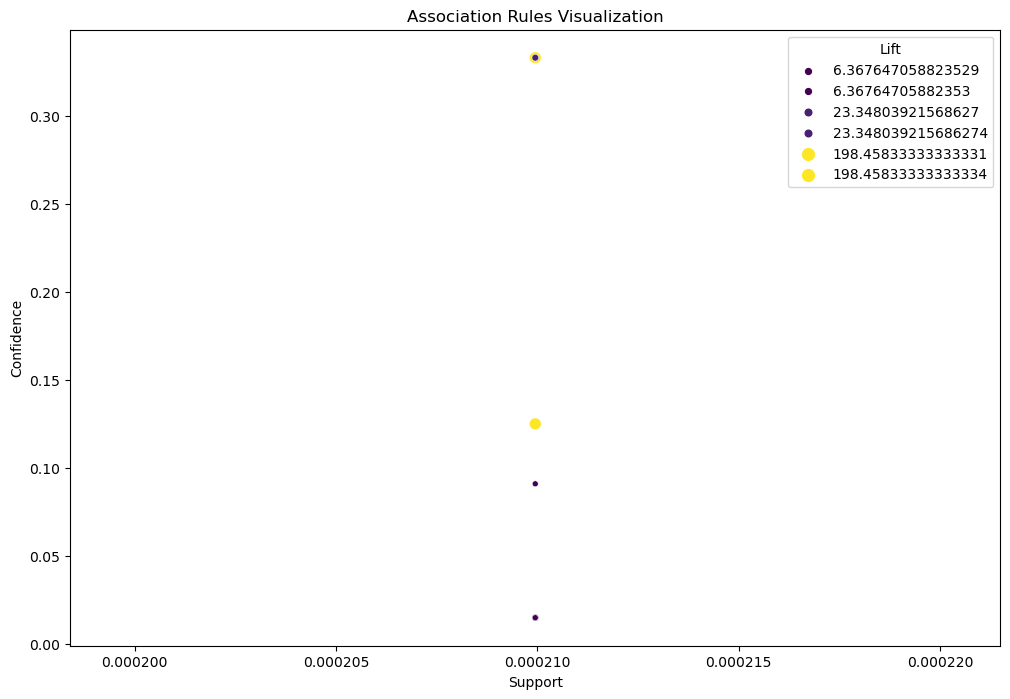

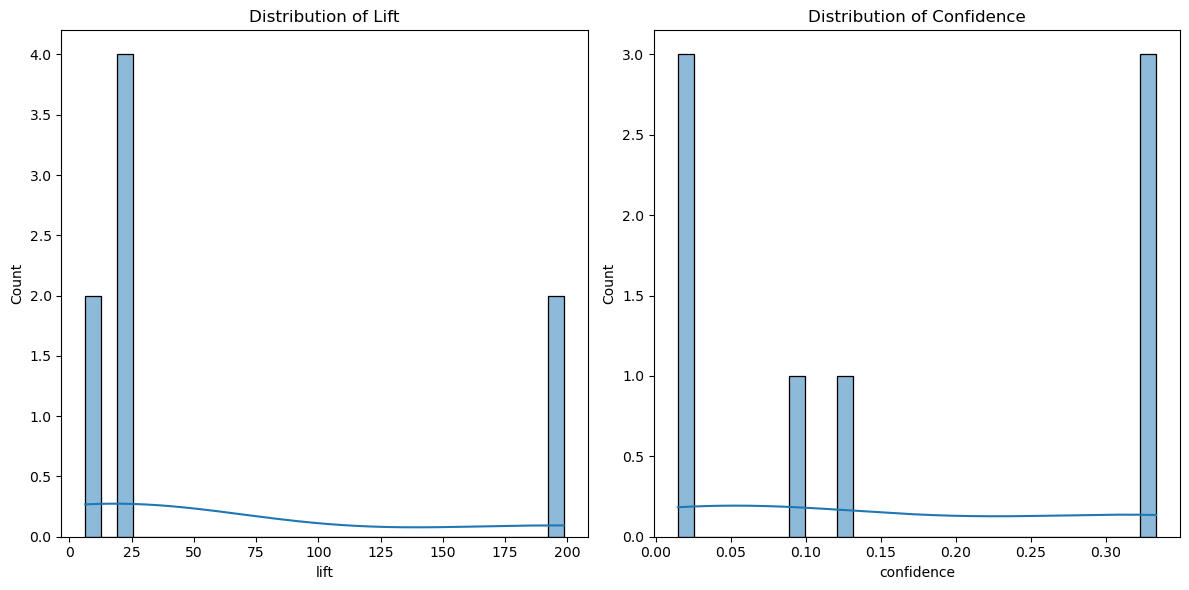

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support vs confidence with lift as size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules_apriori_df, palette='viridis')
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()

# Histograms of lift and confidence
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(rules_apriori_df['lift'], bins=30, kde=True)
plt.title('Distribution of Lift')

plt.subplot(1, 2, 2)
sns.histplot(rules_apriori_df['confidence'], bins=30, kde=True)
plt.title('Distribution of Confidence')

plt.tight_layout()
plt.show()


In [411]:
for index, rule in rules_apriori_df.iterrows():
    print(f"Rule {index}:")
    print(f"Antecedents: {rule['antecedents']}")
    print(f"Consequents: {rule['consequents']}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print(f"Leverage: {rule['leverage']}")
    print(f"Conviction: {rule['conviction']}")
    print(f"Zhang's Metric: {rule['zhangs_metric']}")
    print("\n")


Rule 0:
Antecedents: frozenset({133321259936})
Consequents: frozenset({133887136104})
Support: 0.0002099517111064455
Confidence: 0.3333333333333333
Lift: 198.45833333333334
Leverage: 0.00020889379780252894
Conviction: 1.4974805794667225
Zhang's Metric: 0.9955882352941178


Rule 1:
Antecedents: frozenset({133887136104})
Consequents: frozenset({133321259936})
Support: 0.0002099517111064455
Confidence: 0.125
Lift: 198.45833333333331
Leverage: 0.00020889379780252894
Conviction: 1.1421373084190636
Zhang's Metric: 0.9966351209253419


Rule 2:
Antecedents: frozenset({133711054800})
Consequents: frozenset({134263513883})
Support: 0.0002099517111064455
Confidence: 0.3333333333333333
Lift: 23.348039215686274
Leverage: 0.00020095944802315453
Conviction: 1.4785849254671424
Zhang's Metric: 0.9577731092436975


Rule 3:
Antecedents: frozenset({134263513883})
Consequents: frozenset({133711054800})
Support: 0.0002099517111064455
Confidence: 0.014705882352941176
Lift: 23.34803921568627
Leverage: 0.00020

Rule 7 Details
Antecedents: frozenset({134548020229})
Consequents: frozenset({134263513883})
Support: 0.0002099517111064455
Confidence: 0.09090909090909091
Lift: 6.36764705882353
Leverage: 0.00017698007980104528
Conviction: 1.084295612009238
Zhang's Metric: 0.8449074074074073
Interpretation of Metrics
Antecedents and Consequents:

Antecedents: {134548020229} – This is the item or set of items that appear in the antecedent (left-hand side) of the rule.
Consequents: {134263513883} – This is the item or set of items that appear in the consequent (right-hand side) of the rule.
For Rule 7, it means that if item 134548020229 is purchased, there is a rule that it is associated with the purchase of item 134263513883.

Support:

Support: 0.0002099517111064455 (approximately 0.021%) – This measures how frequently the itemset appears in the dataset. In this case, the rule applies to about 0.021% of all transactions.
Interpretation: This rule is found in a very small fraction of transactions, indicating that the rule is not very common.

Confidence:

Confidence: 0.09090909090909091 (approximately 9.1%) – This measures the probability that the consequent is purchased given that the antecedent is purchased. It means that when item 134548020229 is purchased, there is a 9.1% chance that item 134263513883 will also be purchased.
Interpretation: The rule has relatively low confidence, suggesting that the association is not very strong.

Lift:

Lift: 6.36764705882353 – This measures how much more likely the consequent is to be purchased when the antecedent is purchased, compared to the likelihood of purchasing the consequent without the antecedent.
Interpretation: A lift value greater than 1 indicates that the items are positively associated. A lift of approximately 6.37 suggests a strong positive association; the likelihood of purchasing item 134263513883 is about 6.37 times higher when item 134548020229 is purchased.

Leverage:

Leverage: 0.00017698007980104528 (approximately 0.00018) – This measures the difference between the observed support of the rule and the expected support if the items were independent.
Interpretation: The leverage value is very small, but positive, indicating a slight increase in the likelihood of the consequent given the antecedent, beyond what would be expected by chance.

Conviction:

Conviction: 1.084295612009238 – This measures the degree to which the rule’s antecedent and consequent are dependent. A conviction value close to 1 suggests that the rule’s antecedent and consequent are not strongly dependent.
Interpretation: A conviction value slightly greater than 1 indicates a weak positive association; the antecedent has a small impact on the consequent.

Zhang's Metric:

Zhang's Metric: 0.8449074074074073 – This is a measure of the reliability of the rule. It combines support and confidence to give an overall measure of the rule’s strength.
Interpretation: A higher Zhang’s metric indicates stronger reliability, but it should be considered alongside other metrics.

In [412]:
def get_recommendations(input_products, rules, data, key_column, description_col, max_recommendations=5):
    recommendations = set()

    for index, rule in rules.iterrows():
        # Check if all antecedents in the rule are a subset of the input products
        if set(rule['antecedents']).issubset(set(input_products)):
            # Add consequents from the rule to recommendations
            recommendations.update(rule['consequents'])

    # Remove input products from recommendations
    recommendations = list(recommendations - set(input_products))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = data[data[key_column].isin(recommendations)]
    
    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products[[key_column, description_col]].drop_duplicates().head(max_recommendations)

    return recommended_products

In [413]:
import pickle

# Save the rules DataFrame (rules_fpgrowth) to a file
with open('product_recommendation_model_ebay_apriori.pkl', 'wb') as f:
    pickle.dump(rules_apriori_df, f)

In [414]:
import pickle

# Load the rules DataFrame (rules_fpgrowth) from the file
with open('product_recommendation_model_ebay_apriori.pkl', 'rb') as f:
    rules_apriori = pickle.load(f)

In [415]:
# Example usage
input_products = ['134548020229']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_apriori,  ebay_df, 'Item Number', 'Item Title', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products: Empty DataFrame
Columns: [Item Number, Item Title]
Index: []


## FP-Growth

In [416]:

# Try FP-Growth Algorithm with adjusted min_support
print("Running FP-Growth Algorithm...")
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.0001, use_colnames=True)  # Adjust min_support
if frequent_itemsets_fpgrowth.empty:
    print("No frequent itemsets found with FP-Growth. Consider increasing min_support.")
else:
    pd.DataFrame(frequent_itemsets_fpgrowth)
    rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)
    if rules_fpgrowth.empty:
        print("No association rules found with FP-Growth.")
    else:
        rules_fpgrowth_df = pd.DataFrame(rules_fpgrowth)
rules_fpgrowth_df

Running FP-Growth Algorithm...


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(133711054800),(134263513883),0.000630,0.014277,0.00021,0.333333,23.348039,0.000201,1.478585,0.957773
1,(134263513883),(133711054800),0.014277,0.000630,0.00021,0.014706,23.348039,0.000201,1.014286,0.971033
2,(134263513883),(133847269879),0.014277,0.000630,0.00021,0.014706,23.348039,0.000201,1.014286,0.971033
3,(133847269879),(134263513883),0.000630,0.014277,0.00021,0.333333,23.348039,0.000201,1.478585,0.957773
4,(133321259936),(133887136104),0.000630,0.001680,0.00021,0.333333,198.458333,0.000209,1.497481,0.995588
5,(133887136104),(133321259936),0.001680,0.000630,0.00021,0.125000,198.458333,0.000209,1.142137,0.996635
6,(134263513883),(134548020229),0.014277,0.002309,0.00021,0.014706,6.367647,0.000177,1.012581,0.855165
7,(134548020229),(134263513883),0.002309,0.014277,0.00021,0.090909,6.367647,0.000177,1.084296,0.844907


Support: The proportion of transactions in the dataset that contain both the antecedent and the consequent.

In [417]:
import pickle

# Save the rules DataFrame (rules_fpgrowth) to a file
with open('product_recommendation_model_ebay_fp-growth.pkl', 'wb') as f:
    pickle.dump(rules_fpgrowth_df, f)

In [418]:
import pickle

# Load the rules DataFrame (rules_fpgrowth) from the file
with open('product_recommendation_model_ebay_fp-growth.pkl', 'rb') as f:
    rules_fpgrowth = pickle.load(f)

In [419]:
# Example usage
input_products = ['133711054800']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_fpgrowth, ebay_df, 'Item Number', 'Item Title', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products: Empty DataFrame
Columns: [Item Number, Item Title]
Index: []


Plotting Network Graph for Apriori Rules


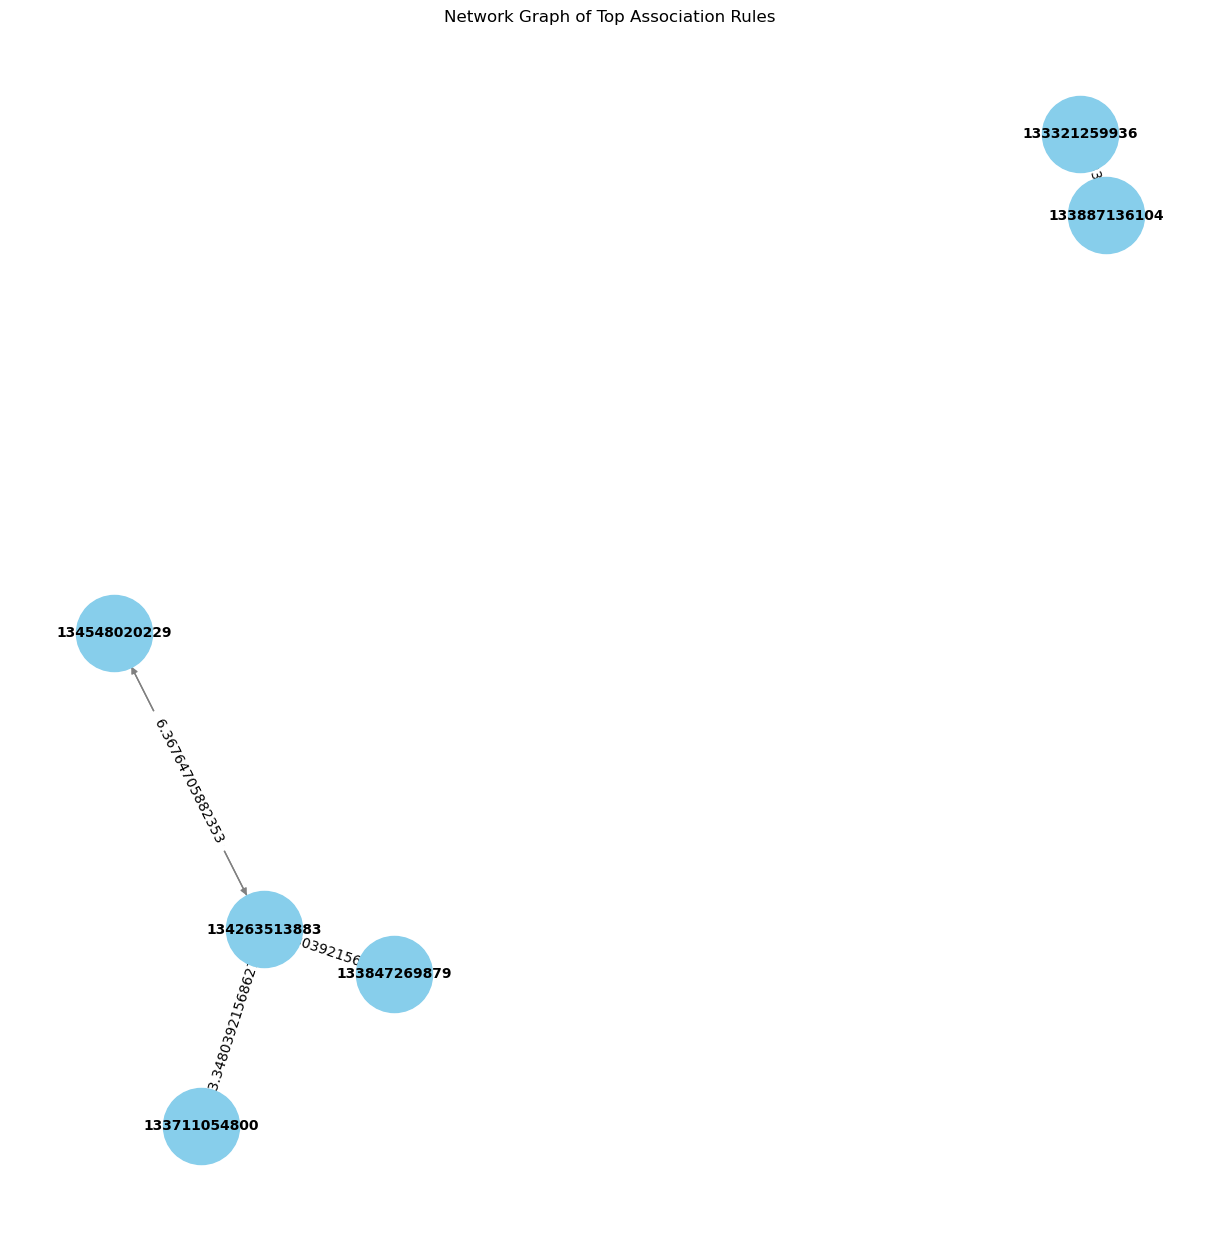

Plotting Network Graph for FP-Growth Rules


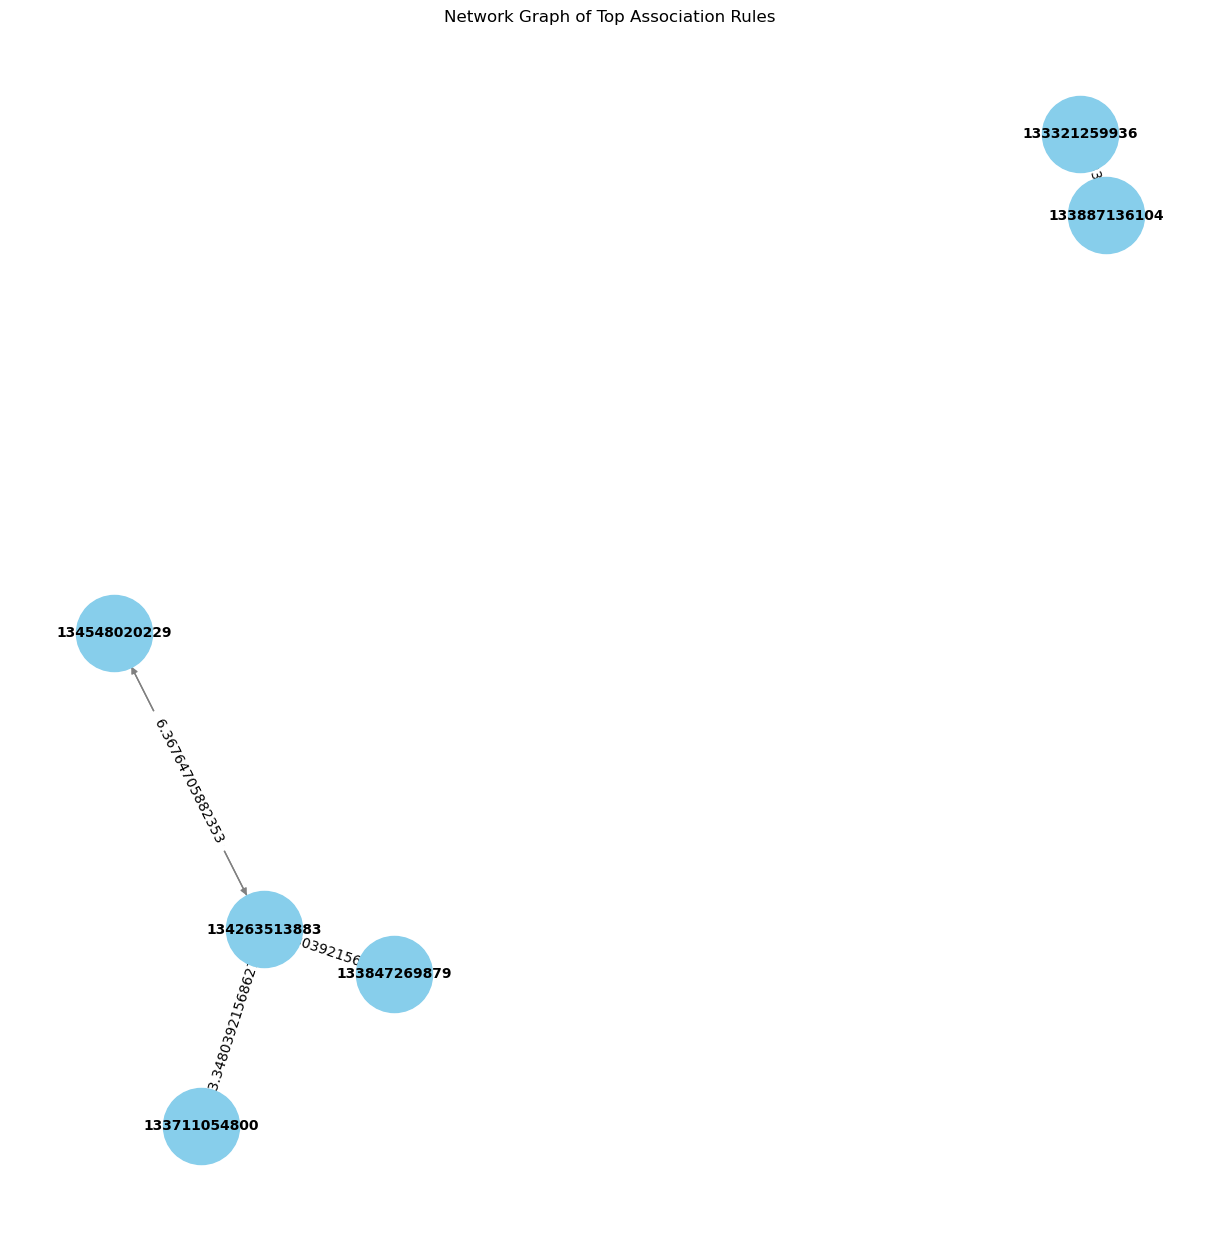

In [420]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network_graph(rules, top_n=10):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Select the top_n rules based on lift
    top_rules = rules.nlargest(top_n, 'lift')
    
    # Add edges to the graph
    for _, row in top_rules.iterrows():
        antecedent = list(row['antecedents'])[0]
        consequent = list(row['consequents'])[0]
        G.add_edge(antecedent, consequent, weight=row['lift'])
    
    # Compute positions for the nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Set the title and show the plot
    plt.title('Network Graph of Top Association Rules')
    plt.show()

# Example: Replace `rules_apriori` and `rules_fpgrowth` with your eBay rules DataFrames

# Plot the network graph for Apriori rules
print("Plotting Network Graph for Apriori Rules")
if 'rules_apriori' in locals() and not rules_apriori.empty:
    plot_network_graph(rules_apriori, top_n=10)
else:
    print("No association rules found with Apriori to plot.")

# Plot the network graph for FP-Growth rules
print("Plotting Network Graph for FP-Growth Rules")
if 'rules_fpgrowth' in locals() and not rules_fpgrowth.empty:
    plot_network_graph(rules_fpgrowth, top_n=10)
else:
    print("No association rules found with FP-Growth to plot.")


# Emsbay Handel - Order Report

In [421]:
order_report = pd.read_csv("/Users/enejanhayytjanova/Desktop/My Githup/Internship/Veri Setleri Son Hali/order_report_final.csv")

In [422]:
order_report.head()

,order_id,purchase_date,last-updated-date,order_status,fulfillment,sales_channel,ship_service_level,asin,item_status,quantity,currency,item_price,item_tax,ship_city,ship_country,business_order,amazon_invoiced,vat_item_price,vat_shipping_price,product
0,403-3538797-3315514,2024-05-30 19:42:29+00:00,2024-05-30 19:43:33+00:00,Pending,Amazon,Amazon.fr,Standard,B0BG6C5W29,Unshipped,1,EUR,21.92,NaN,Rodez,FR,False,False,0.00,0.00,Bioblas knoblauch sparset l schwarzer knoblauc...
1,403-2785111-7915524,2024-05-30 06:29:12+00:00,2024-05-30 18:46:42+00:00,Pending,Amazon,Amazon.fr,Expedited,B0B5ZX1L4W,Unshipped,1,EUR,18.39,NaN,Leforest,FR,False,False,0.00,0.00,"Knoblauch shampoo 500 ml bioblas, geruchlos, a..."
2,408-0172287-1765114,2024-05-30 02:04:18+00:00,2024-05-30 21:38:15+00:00,Shipped,Amazon,Amazon.fr,Expedited,B0BNQNQ5QV,Shipped,1,EUR,12.05,NaN,Nogent sur marne,FR,True,True,12.05,3.49,Caykur - turkish black tea - 500g - filiz luks
3,407-4797506-9725169,2024-05-29 18:55:32+00:00,2024-05-31 12:00:12+00:00,Shipped,Amazon,Amazon.fr,Standard,B093YJTCRD,Shipped,1,EUR,8.89,1.48,Lyon,FR,False,True,7.41,0.00,"10x ag7 (lr57, lr927, 395) 1,5v - poundmax alk..."
4,408-5905918-1030744,2024-05-29 08:22:11+00:00,2024-05-29 16:51:55+00:00,Shipped,Amazon,Amazon.fr,Expedited,B00V0R6HAE,Shipped,1,EUR,9.49,1.58,Pierrefitte sur seine,FR,False,True,7.91,0.00,"Poundmax alkaline-sicherheitsbatterien, 23ae/a..."


In [423]:
order_report.columns

Index(['order_id', 'purchase_date', 'last-updated-date', 'order_status',
       'fulfillment', 'sales_channel', 'ship_service_level', 'asin',
       'item_status', 'quantity', 'currency', 'item_price', 'item_tax',
       'ship_city', 'ship_country', 'business_order', 'amazon_invoiced',
       'vat_item_price', 'vat_shipping_price', 'product'],
      dtype='object')

## Apriori

In [424]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth


# Prepare the basket matrix
basket = order_report[['order_id', 'asin']]

# Aggregate items by order_id
basket = basket.groupby(['order_id', 'asin'])['asin'].count().unstack().reset_index().fillna(0).set_index('order_id')

# Convert the counts to 1 (purchased) or 0 (not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Ensure the DataFrame is boolean
basket = basket.astype(bool)

# Calculate sparsity level
sparsity = (basket.sum().sum()) / (basket.shape[0] * basket.shape[1])
print(f"Sparsity level: {sparsity * 100:.2f}%")

# Apply Apriori Algorithm with adjusted min_support
print("Running Apriori Algorithm...")
frequent_itemsets_apriori = apriori(basket, min_support=0.0001, use_colnames=True)  # Adjust min_support as needed
if frequent_itemsets_apriori.empty:
    print("No frequent itemsets found with Apriori. Consider increasing min_support.")
else:
    print("Frequent itemsets from Apriori:")
    pd.DataFrame(frequent_itemsets_apriori).head()
    
    # Generate association rules
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.0)
    if rules_apriori.empty:
        print("No association rules found with Apriori.")
    else:
        print("Association rules from Apriori:")
        rules_apriori_df = pd.DataFrame(rules_apriori)

rules_apriori_df.head()

Sparsity level: 0.18%
Running Apriori Algorithm...
Frequent itemsets from Apriori:
Association rules from Apriori:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B0043ZUSAA),(B004TGGEF6),0.002174,0.001108,0.000143,0.065637,59.242921,0.000140,1.069062,0.985262
1,(B004TGGEF6),(B0043ZUSAA),0.001108,0.002174,0.000143,0.128788,59.242921,0.000140,1.145331,0.984211
2,(B00D5VHR3O),(B0043ZUSAA),0.016653,0.002174,0.000143,0.008569,3.941565,0.000106,1.006450,0.758932
3,(B0043ZUSAA),(B00D5VHR3O),0.002174,0.016653,0.000143,0.065637,3.941565,0.000106,1.052426,0.747920
4,(B004YXNJB6),(B004YXNHD6),0.004188,0.008125,0.000579,0.138277,17.019015,0.000545,1.151037,0.945201


In [425]:
def get_recommendations(input_products, rules, data, key_column, description_col, max_recommendations=5):
    recommendations = set()

    for index, rule in rules.iterrows():
        # Check if all antecedents in the rule are a subset of the input products
        if set(rule['antecedents']).issubset(set(input_products)):
            # Add consequents from the rule to recommendations
            recommendations.update(rule['consequents'])

    # Remove input products from recommendations
    recommendations = list(recommendations - set(input_products))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = data[data[key_column].isin(recommendations)]
    
    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products[[key_column, description_col]].drop_duplicates().head(max_recommendations)

    return recommended_products



# Save the model (rules) using pickle
with open('product_recommendation_model_order_apriori.pkl', 'wb') as f:
    pickle.dump(rules_apriori_df, f)

In [426]:
import pickle

# Load the rules DataFrame (rules_fpgrowth) from the file
with open('product_recommendation_model_ebay_apriori.pkl', 'rb') as f:
    rules_apriori = pickle.load(f)
    
    
# Example usage
input_products = ['B00D5VHR3O']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_apriori,  order_report, 'asin', 'product', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products: Empty DataFrame
Columns: [asin, product]
Index: []


In [427]:
# Apply FP-Growth Algorithm with adjusted min_support
print("Running FP-Growth Algorithm...")
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.0001, use_colnames=True)  # Adjust min_support as needed
if frequent_itemsets_fpgrowth.empty:
    print("No frequent itemsets found with FP-Growth. Consider increasing min_support.")
else:
    print("Frequent itemsets from FP-Growth:")
    pd.DataFrame(frequent_itemsets_fpgrowth)
    
    # Generate association rules
    rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1.0)
    if rules_fpgrowth.empty:
        print("No association rules found with FP-Growth.")
    else:
        print("Association rules from FP-Growth:")
        rules_fpgrowth_df = pd.DataFrame(rules_fpgrowth)

rules_fpgrowth_df.head()

Running FP-Growth Algorithm...
Frequent itemsets from FP-Growth:
Association rules from FP-Growth:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B093VFHMDW),(B07NGPMK8B),0.002501,0.016946,0.000243,0.097315,5.742575,0.000201,1.089033,0.827933
1,(B07NGPMK8B),(B093VFHMDW),0.016946,0.002501,0.000243,0.014364,5.742575,0.000201,1.012035,0.840099
2,(B00SR9XE2W),(B00DE5YQ6W),0.003341,0.004130,0.000520,0.155779,37.722872,0.000507,1.179632,0.976754
3,(B00DE5YQ6W),(B00SR9XE2W),0.004130,0.003341,0.000520,0.126016,37.722872,0.000507,1.140364,0.977528
4,(B00G8HW0DO),(B00NE3C0UI),0.009031,0.007890,0.000126,0.013941,1.766902,0.000055,1.006136,0.437993


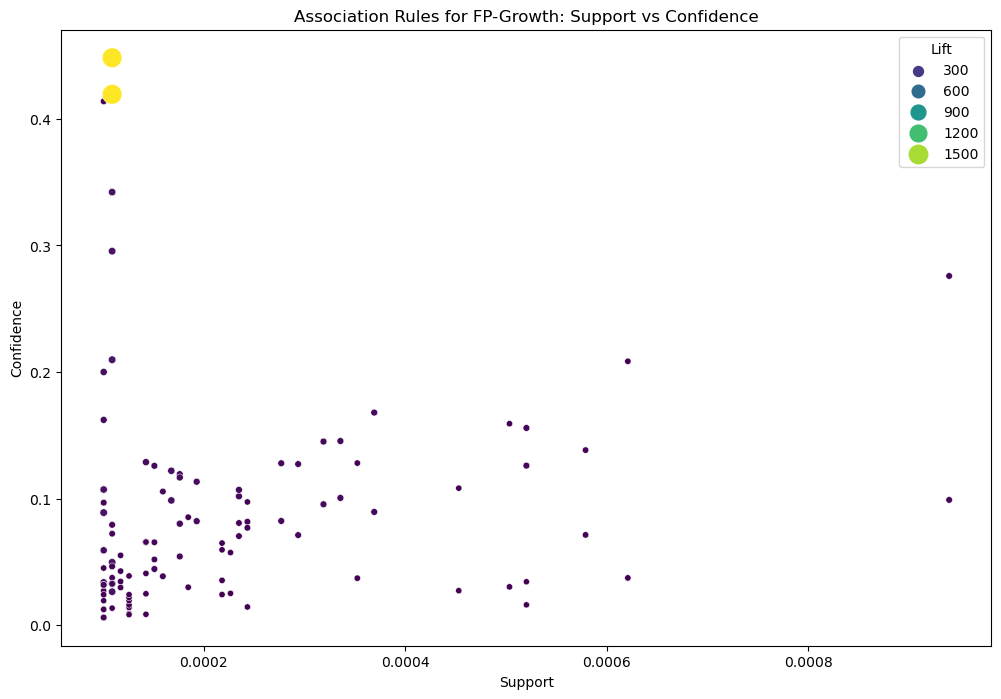

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Scatter Plot of Rules
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rules_fpgrowth_df, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(20, 200))
plt.title('Association Rules for FP-Growth: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.show()


Plotting Histograms for Apriori Rules


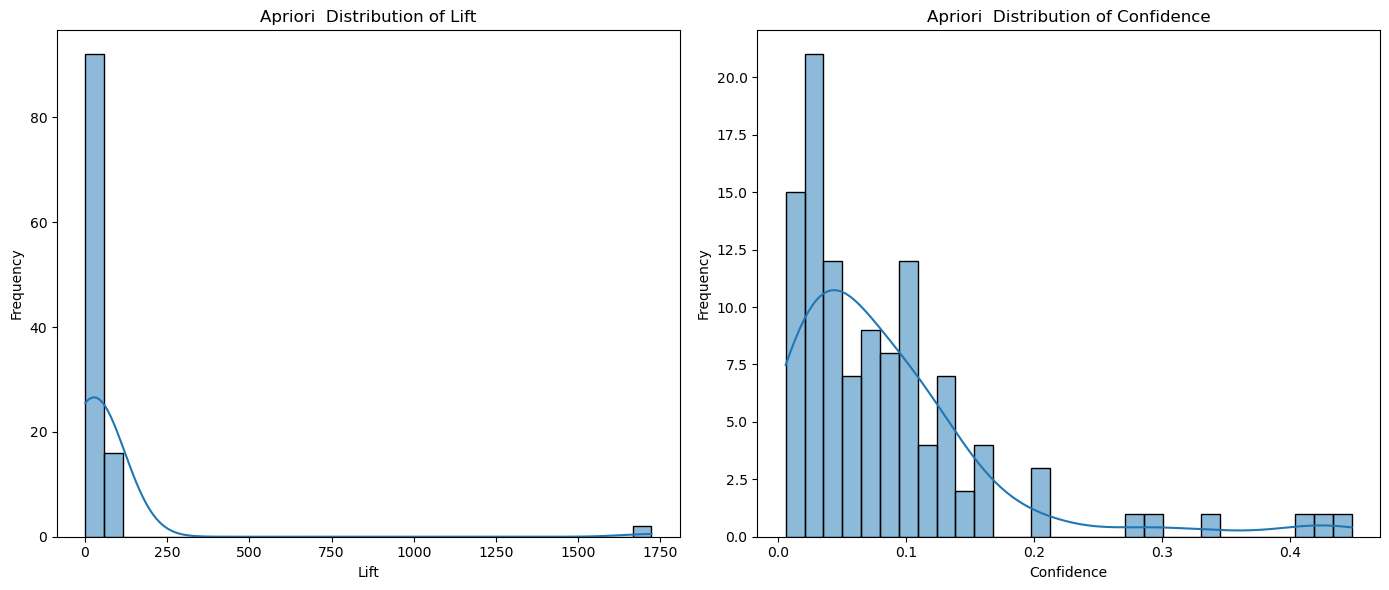

Plotting Histograms for FP-Growth Rules


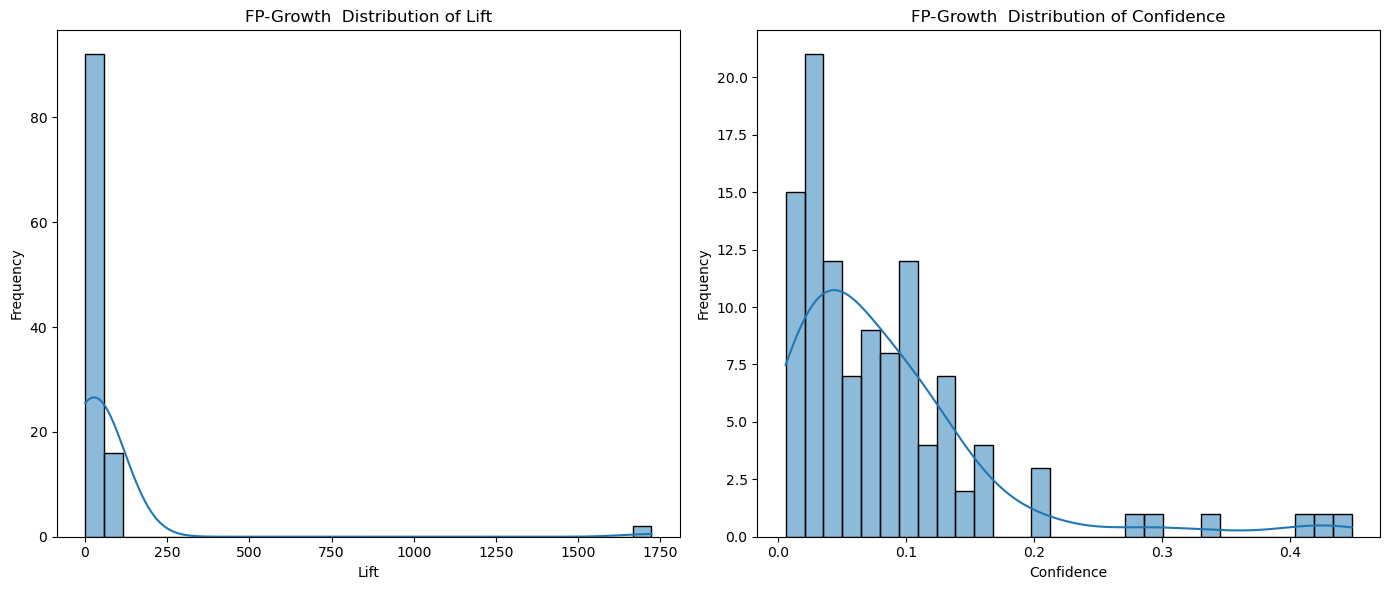

In [429]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def plot_histograms(rules, title_prefix=''):
    plt.figure(figsize=(14, 6))

    # Plot Lift Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(rules['lift'], bins=30, kde=True)
    plt.title(f'{title_prefix} Distribution of Lift')
    plt.xlabel('Lift')
    plt.ylabel('Frequency')

    # Plot Confidence Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(rules['confidence'], bins=30, kde=True)
    plt.title(f'{title_prefix} Distribution of Confidence')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Assuming `rules_apriori` and `rules_fpgrowth` are your DataFrames of association rules from the Apriori and FP-Growth algorithms

# Plot histograms for Apriori rules
print("Plotting Histograms for Apriori Rules")
if 'rules_apriori' in locals() and not rules_apriori.empty:
    plot_histograms(rules_apriori_df, title_prefix='Apriori ')
else:
    print("No association rules found with Apriori to plot histograms.")

# Plot histograms for FP-Growth rules
print("Plotting Histograms for FP-Growth Rules")
if 'rules_fpgrowth' in locals() and not rules_fpgrowth.empty:
    plot_histograms(rules_fpgrowth_df, title_prefix='FP-Growth ')
else:
    print("No association rules found with FP-Growth to plot histograms.")


Plotting Network Graph for Apriori Rules


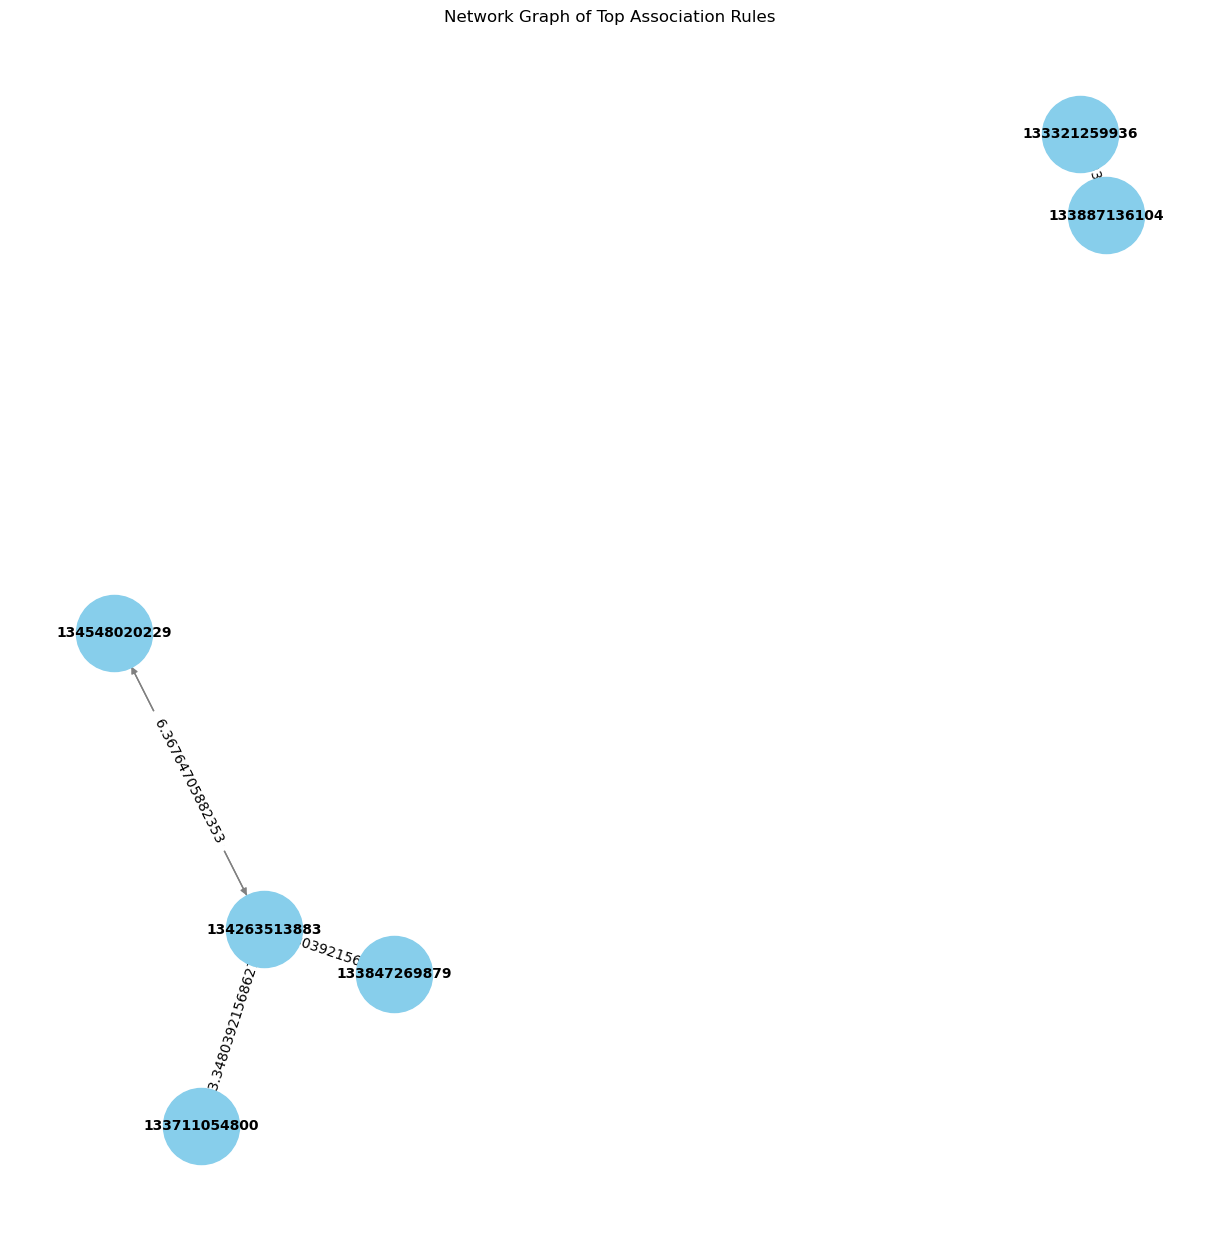

Plotting Network Graph for FP-Growth Rules


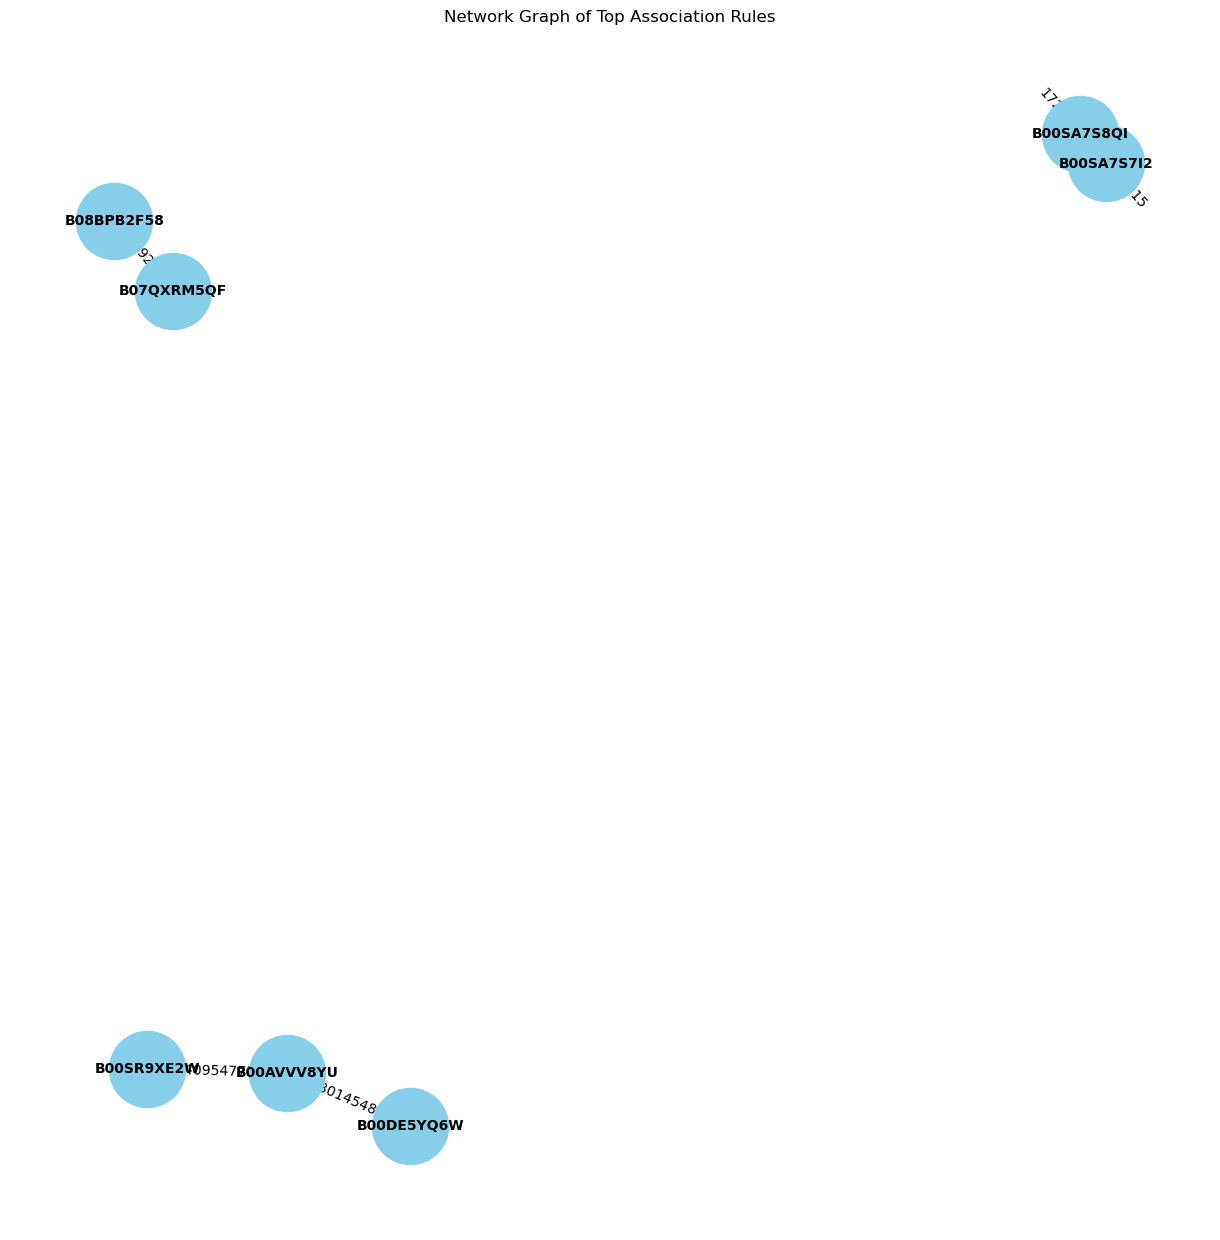

In [430]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def plot_network_graph(rules, top_n=10):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Select the top_n rules based on lift
    top_rules = rules.nlargest(top_n, 'lift')
    
    # Add edges to the graph
    for _, row in top_rules.iterrows():
        antecedent = list(row['antecedents'])[0]
        consequent = list(row['consequents'])[0]
        G.add_edge(antecedent, consequent, weight=row['lift'])
    
    # Compute positions for the nodes
    pos = nx.spring_layout(G, seed=42)
    
    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Set the title and show the plot
    plt.title('Network Graph of Top Association Rules')
    plt.show()

# Assuming `rules_apriori` and `rules_fpgrowth` are your DataFrames of association rules from the Apriori and FP-Growth algorithms

# Plot the network graph for Apriori rules
print("Plotting Network Graph for Apriori Rules")
if 'rules_apriori' in locals() and not rules_apriori.empty:
    plot_network_graph(rules_apriori, top_n=10)
else:
    print("No association rules found with Apriori to plot.")

# Plot the network graph for FP-Growth rules
print("Plotting Network Graph for FP-Growth Rules")
if 'rules_fpgrowth' in locals() and not rules_fpgrowth.empty:
    plot_network_graph(rules_fpgrowth, top_n=10)
else:
    print("No association rules found with FP-Growth to plot.")


# FP-Growth

In [431]:
def get_recommendations(input_products, rules, data, key_column, description_col, max_recommendations=5):
    recommendations = set()

    for index, rule in rules.iterrows():
        # Check if all antecedents in the rule are a subset of the input products
        if set(rule['antecedents']).issubset(set(input_products)):
            # Add consequents from the rule to recommendations
            recommendations.update(rule['consequents'])

    # Remove input products from recommendations
    recommendations = list(recommendations - set(input_products))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = data[data[key_column].isin(recommendations)]
    
    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products[[key_column, description_col]].drop_duplicates().head(max_recommendations)

    return recommended_products


In [432]:
# Save the model (rules) using pickle
with open('product_recommendation_model_order_fp-growth.pkl', 'wb') as f:
    pickle.dump(rules_fpgrowth, f)

In [433]:
import pickle

# Load the rules DataFrame (rules_fpgrowth) from the file
with open('product_recommendation_model_ebay_apriori.pkl', 'rb') as f:
    rules_apriori = pickle.load(f)
    
    
# Example usage
input_products = ['B00D5VHR3O']  # Replace with your input product SKUs
recommended_products = get_recommendations(input_products, rules_fpgrowth,  order_report, 'asin', 'product', max_recommendations=5)

print("Recommended Products:", recommended_products)

Recommended Products:              asin                                            product
548    B004YXNJB6        Zwiebelcreme (vöröshagymakrém), 160g tube -
3286   B07V7329Z3                      Univer zwiebelcreme 160g tube
15859  B0043ZUSAA  Paprikacreme rotes gold (piros arany), 160g tu...
27620  B07DPTCNNR  Univer | knoblauch-chili-creme 160 tube, fokha...


In [434]:
def get_recommendations(input_products, rules, data, key_column, description_col, max_recommendations=5):
    recommendations = set()

    for index, rule in rules.iterrows():
        # Check if all antecedents in the rule are a subset of the input products
        if set(rule['antecedents']).issubset(set(input_products)):
            # Add consequents from the rule to recommendations
            recommendations.update(rule['consequents'])

    # Remove input products from recommendations
    recommendations = list(recommendations - set(input_products))

    # Fetch product descriptions for the recommended SKUs
    recommended_products = data[data[key_column].isin(recommendations)]
    
    # Limit the number of recommendations to max_recommendations
    recommended_products = recommended_products[[key_column, description_col]].drop_duplicates().head(max_recommendations)

    return recommended_products
